In [123]:
import my_utils as mu
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import time
import requests

In [7]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 윈도우

In [8]:
# lol 견본 데이터 만들기

In [9]:
# 브론즈
bronze_raw = mu.get_rawdata('BRONZE')

100%|██████████| 12/12 [01:14<00:00,  6.20s/it]


In [10]:
# 골드
gold_raw = mu.get_rawdata('GOLD')

100%|██████████| 12/12 [01:04<00:00,  5.39s/it]


In [11]:
# 다이아
dia_raw = mu.get_rawdata('DIAMOND')

100%|██████████| 12/12 [01:10<00:00,  5.90s/it]


In [12]:
bronze_raw

,match_id,matches,timelines
0,KR_6408981794,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
1,KR_6408913113,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
2,KR_6391889080,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
3,KR_6411184194,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
4,KR_6411108274,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
5,KR_6411028066,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
6,KR_6409501102,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
7,KR_6409376940,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
8,KR_6400944599,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
9,KR_6399769758,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."


In [13]:
gold_raw

,match_id,matches,timelines
0,KR_6414789956,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
1,KR_6414767432,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
2,KR_6414745069,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
3,KR_6413715254,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
4,KR_6413688212,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
5,KR_6413649195,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
6,KR_6395747308,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'status': {'message': 'Rate limit exceeded', ..."
7,KR_6395668842,"{'status': {'message': 'Rate limit exceeded', ...","{'status': {'message': 'Rate limit exceeded', ..."
8,KR_6395574956,"{'status': {'message': 'Rate limit exceeded', ...","{'status': {'message': 'Rate limit exceeded', ..."
9,status,"{'status': {'message': 'Rate limit exceeded', ...","{'status': {'message': 'Rate limit exceeded', ..."


In [14]:
dia_raw

,match_id,matches,timelines
0,KR_6415368525,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
1,KR_6415317488,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
2,KR_6414277632,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
3,KR_6403760533,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
4,KR_6403735000,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
5,KR_6403728065,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
6,KR_6392182519,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
7,KR_6392174396,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
8,KR_6392161815,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
9,KR_6406578076,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."


In [15]:
# 골드 사용량에 따른 승패 여부

In [17]:
def get_gold_df(raw_data) :
    df_creator = []
    print('소환사 스텟 생성 중...')
    for i in range(len(raw_data)) :
        if 'status' in raw_data.iloc[i]['matches'].keys() or 'status' in  raw_data.iloc[i]['timelines'].keys():
            print('status : 426')
        else :
            for j in range(len(raw_data.iloc[i]['matches']['info']['participants'])) :
                lst_match = []
                lst_match.append(raw_data.iloc[i]['matches']['info']['gameId'])
                lst_match.append(raw_data.iloc[i]['matches']['info']['participants'][j]['goldEarned'])
                lst_match.append(raw_data.iloc[i]['matches']['info']['participants'][j]['goldSpent'])
                lst_match.append(raw_data.iloc[i]['matches']['info']['participants'][j]['summonerName'])
                lst_match.append(raw_data.iloc[i]['matches']['info']['participants'][j]['teamId'])
                lst_match.append(raw_data.iloc[i]['matches']['info']['participants'][j]['win'])
                df_creator.append(lst_match)
    gold_df = pd.DataFrame(df_creator, columns = ['gameId', 'goldEarned', 'goldSpent', 'summonerName', 'teamId', 'win'])
    return gold_df

In [25]:
bronze_gold_df = get_gold_df(bronze_raw)
bronze_gold_df

소환사 스텟 생성 중...


,gameId,goldEarned,goldSpent,summonerName,teamId,win
0,6408981794,15771,13750,야스오만 안함,100,True
1,6408981794,21816,19975,Vo1cano,100,True
2,6408981794,14919,14010,갱와봐라다흘린다,100,True
3,6408981794,14139,14050,어르신123,100,True
4,6408981794,8483,8200,프렌치불독쫀귀탱,100,True
...,...,...,...,...,...,...
355,6412255662,2907,500,DOGENG,200,False
356,6412255662,4953,4700,매력학과매니저,200,False
357,6412255662,5321,5225,1QSHAN,200,False
358,6412255662,5733,5225,만수무강기원,200,False


In [21]:
gold_gold_df = get_gold_df(gold_raw)
gold_gold_df

소환사 스텟 생성 중...
status : 426
status : 426
status : 426
status : 426
status : 426
status : 426
status : 426


,gameId,goldEarned,goldSpent,summonerName,teamId,win
0,6414789956,14002,12525,Zeromski,100,True
1,6414789956,15529,14425,공포의마초최,100,True
2,6414789956,11950,10775,티펜티,100,True
3,6414789956,14811,11750,다 패 죽여,100,True
4,6414789956,9974,8700,대도APT,100,True
...,...,...,...,...,...,...
205,6415364983,6057,4425,한국산솔킬폭격기,200,True
206,6415364983,6152,5025,회전치킨,200,True
207,6415364983,4926,4100,YSL 입생로랑,200,True
208,6415364983,6674,6425,미스ab,200,True


In [22]:
dia_gold_df = get_gold_df(dia_raw)
dia_gold_df

소환사 스텟 생성 중...
status : 426
status : 426
status : 426
status : 426


,gameId,goldEarned,goldSpent,summonerName,teamId,win
0,6415368525,5953,5650,나는나쁜놈이야,100,True
1,6415368525,7616,4635,꼬북이물대포팡,100,True
2,6415368525,5978,3875,K 잼,100,True
3,6415368525,8536,8150,spice girl,100,True
4,6415368525,5036,4875,케리아만나러챌감,100,True
...,...,...,...,...,...,...
295,6412490987,13225,13100,24244IxI,200,False
296,6412490987,10694,10575,R0AD,200,False
297,6412490987,12968,12875,이젠정말지쳤어,200,False
298,6412490987,13342,12975,Twitch 영지르,200,False


In [26]:
b_win_team = bronze_gold_df[bronze_gold_df.win == True]
b_win_team

,gameId,goldEarned,goldSpent,summonerName,teamId,win
0,6408981794,15771,13750,야스오만 안함,100,True
1,6408981794,21816,19975,Vo1cano,100,True
2,6408981794,14919,14010,갱와봐라다흘린다,100,True
3,6408981794,14139,14050,어르신123,100,True
4,6408981794,8483,8200,프렌치불독쫀귀탱,100,True
...,...,...,...,...,...,...
350,6412255662,7303,6835,볼리베어하는남자,100,True
351,6412255662,5725,5310,큐와W이그리고R,100,True
352,6412255662,4765,3000,JAYSON25,100,True
353,6412255662,5071,4700,넛 백,100,True


In [28]:
b_lose_team = bronze_gold_df[bronze_gold_df.win == False]
b_lose_team

,gameId,goldEarned,goldSpent,summonerName,teamId,win
5,6408981794,10741,9975,승진이형,200,False
6,6408981794,12964,12675,DODOAZNKLEQEV,200,False
7,6408981794,16845,16350,벚꽃이지면나는,200,False
8,6408981794,16602,16830,니인생버닝썬,200,False
9,6408981794,10912,10075,우33좌33,200,False
...,...,...,...,...,...,...
355,6412255662,2907,500,DOGENG,200,False
356,6412255662,4953,4700,매력학과매니저,200,False
357,6412255662,5321,5225,1QSHAN,200,False
358,6412255662,5733,5225,만수무강기원,200,False


In [29]:
g_win_team = gold_gold_df[gold_gold_df.win == True]
g_win_team

,gameId,goldEarned,goldSpent,summonerName,teamId,win
0,6414789956,14002,12525,Zeromski,100,True
1,6414789956,15529,14425,공포의마초최,100,True
2,6414789956,11950,10775,티펜티,100,True
3,6414789956,14811,11750,다 패 죽여,100,True
4,6414789956,9974,8700,대도APT,100,True
...,...,...,...,...,...,...
205,6415364983,6057,4425,한국산솔킬폭격기,200,True
206,6415364983,6152,5025,회전치킨,200,True
207,6415364983,4926,4100,YSL 입생로랑,200,True
208,6415364983,6674,6425,미스ab,200,True


In [30]:
g_lose_team = gold_gold_df[gold_gold_df.win == False]
g_lose_team

,gameId,goldEarned,goldSpent,summonerName,teamId,win
5,6414789956,10865,10525,누나랑썸타요,200,False
6,6414789956,12658,12475,Bvell,200,False
7,6414789956,9557,9160,복 바 든,200,False
8,6414789956,11561,11225,복실꼬리,200,False
9,6414789956,14131,13650,시바새끼귀여워,200,False
...,...,...,...,...,...,...
200,6415364983,3990,3100,성질 긁지마라,100,False
201,6415364983,4641,4025,3 Strike 0ut,100,False
202,6415364983,5708,4150,울산악마,100,False
203,6415364983,5365,4775,원딜나라,100,False


In [31]:
d_win_team = dia_gold_df[dia_gold_df.win == True]
d_win_team

,gameId,goldEarned,goldSpent,summonerName,teamId,win
0,6415368525,5953,5650,나는나쁜놈이야,100,True
1,6415368525,7616,4635,꼬북이물대포팡,100,True
2,6415368525,5978,3875,K 잼,100,True
3,6415368525,8536,8150,spice girl,100,True
4,6415368525,5036,4875,케리아만나러챌감,100,True
...,...,...,...,...,...,...
290,6412490987,11165,9100,털린다미어,100,True
291,6412490987,15283,12925,마음을 가다듬어,100,True
292,6412490987,10651,9550,북극황제펭귄,100,True
293,6412490987,17842,15500,응 아잇 어 12번,100,True


In [32]:
d_lose_team = dia_gold_df[dia_gold_df.win == False]
d_lose_team

,gameId,goldEarned,goldSpent,summonerName,teamId,win
5,6415368525,5757,5000,트롤칸신,200,False
6,6415368525,5348,4975,보미여름이가을이,200,False
7,6415368525,6390,5935,R 럽,200,False
8,6415368525,5335,4500,혁둥잉,200,False
9,6415368525,3234,2900,ArinArin,200,False
...,...,...,...,...,...,...
295,6412490987,13225,13100,24244IxI,200,False
296,6412490987,10694,10575,R0AD,200,False
297,6412490987,12968,12875,이젠정말지쳤어,200,False
298,6412490987,13342,12975,Twitch 영지르,200,False


In [37]:
# x = goldEarned, y = goldSpent
b_w_x = b_win_team.goldEarned
b_w_y = b_win_team.goldSpent
b_l_x = b_lose_team.goldEarned
b_l_y = b_lose_team.goldSpent

g_w_x = g_win_team.goldEarned
g_w_y = g_win_team.goldSpent
g_l_x = g_lose_team.goldEarned
g_w_y = g_lose_team.goldSpent

d_w_x = d_win_team.goldEarned
d_w_y = d_win_team.goldSpent
d_l_x = d_lose_team.goldEarned
d_l_y = d_lose_team.goldSpent

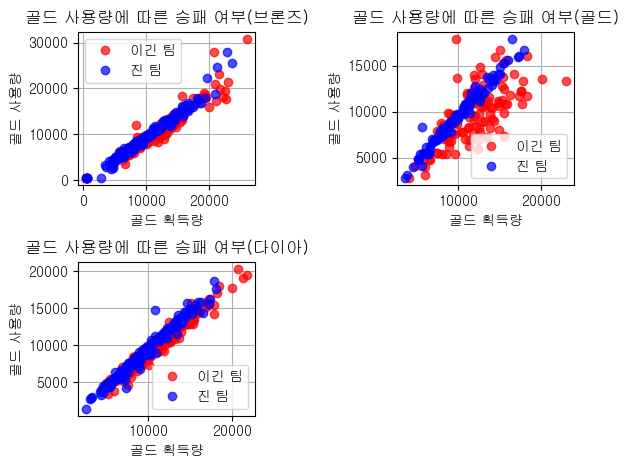

In [64]:
plt.figure()
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.8, hspace=0.5)

plt.subplot(2, 2, 1)
plt.plot(b_w_x, b_w_y, color = 'r', marker = 'o', linestyle = 'None', alpha=0.7, label = '이긴 팀')
plt.plot(b_l_x, b_l_y, color = 'b', marker = 'o', linestyle = 'None', alpha=0.7, label = '진 팀')

plt.xlabel('골드 획득량')
plt.ylabel('골드 사용량')
plt.title('골드 사용량에 따른 승패 여부(브론즈)')
plt.legend(loc = 'best', ncol = 1)
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(g_w_x, g_w_y, color = 'r', marker = 'o', linestyle = 'None', linewidth=5, alpha=0.7, label = '이긴 팀')
plt.plot(g_l_x, g_w_y, color = 'b', marker = 'o', linestyle = 'None', linewidth=5, alpha=0.7, label = '진 팀')

plt.xlabel('골드 획득량')
plt.ylabel('골드 사용량')
plt.title('골드 사용량에 따른 승패 여부(골드)')
plt.legend(loc = 'best', ncol = 1)
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(d_w_x, d_w_y, color = 'r', marker = 'o', linewidth=5, linestyle = 'None', alpha=0.7, label = '이긴 팀')
plt.plot(d_l_x, d_l_y, color = 'b', marker = 'o', linewidth=5, linestyle = 'None', alpha=0.7, label = '진 팀')

plt.xlabel('골드 획득량')
plt.ylabel('골드 사용량')
plt.title('골드 사용량에 따른 승패 여부(다이아)')
plt.legend(loc = 'best', ncol = 1)
plt.grid(True)

In [65]:
# 라인 별 미니언 킬 수와 경기 승리 여부의 관계 확인

In [67]:
def get_lane_minion_kills(raw_data) :
    df_creator = []
    print('소환사 스텟 생성 중...')
    for i in range(len(raw_data)) :
        if 'status' in raw_data.iloc[i]['matches'].keys() or 'status' in  raw_data.iloc[i]['timelines'].keys():
            print('status : 426')
        else :
            for j in range(len(raw_data.iloc[i]['matches']['info']['participants'])) :
                lst_match = []
                lst_match.append(raw_data.iloc[i].matches['info']['gameId'])
                lst_match.append(raw_data.iloc[i].matches['info']['participants'][j]['summonerName'])
                lst_match.append(raw_data.iloc[i].matches['info']['participants'][j]['lane'])
                lst_match.append(raw_data.iloc[i].matches['info']['participants'][j]['totalMinionsKilled'])
                lst_match.append(raw_data.iloc[i].matches['info']['participants'][j]['win'])
                df_creator.append(lst_match)
    minion_kill = pd.DataFrame(df_creator, columns = ['gameId', 'summonerName', 'lane', 'totalMinionsKilled', 'win'])
    return minion_kill

In [69]:
bronze_mini_df = get_lane_minion_kills(bronze_raw)
bronze_mini_df

소환사 스텟 생성 중...


,gameId,summonerName,lane,totalMinionsKilled,win
0,6408981794,야스오만 안함,TOP,194,True
1,6408981794,Vo1cano,JUNGLE,55,True
2,6408981794,갱와봐라다흘린다,MIDDLE,190,True
3,6408981794,어르신123,BOTTOM,163,True
4,6408981794,프렌치불독쫀귀탱,MIDDLE,34,True
...,...,...,...,...,...
355,6412255662,DOGENG,NONE,28,False
356,6412255662,매력학과매니저,NONE,27,False
357,6412255662,1QSHAN,NONE,132,False
358,6412255662,만수무강기원,NONE,126,False


In [70]:
gold_mini_df = get_lane_minion_kills(gold_raw)
gold_mini_df

소환사 스텟 생성 중...
status : 426
status : 426
status : 426
status : 426
status : 426
status : 426
status : 426


,gameId,summonerName,lane,totalMinionsKilled,win
0,6414789956,Zeromski,JUNGLE,49,True
1,6414789956,공포의마초최,MIDDLE,205,True
2,6414789956,티펜티,TOP,164,True
3,6414789956,다 패 죽여,BOTTOM,201,True
4,6414789956,대도APT,BOTTOM,37,True
...,...,...,...,...,...
205,6415364983,한국산솔킬폭격기,NONE,99,True
206,6415364983,회전치킨,NONE,10,True
207,6415364983,YSL 입생로랑,NONE,70,True
208,6415364983,미스ab,NONE,98,True


In [71]:
dia_mini_df = get_lane_minion_kills(dia_raw)
dia_mini_df

소환사 스텟 생성 중...
status : 426
status : 426
status : 426
status : 426


,gameId,summonerName,lane,totalMinionsKilled,win
0,6415368525,나는나쁜놈이야,NONE,93,True
1,6415368525,꼬북이물대포팡,NONE,10,True
2,6415368525,K 잼,NONE,118,True
3,6415368525,spice girl,NONE,131,True
4,6415368525,케리아만나러챌감,NONE,19,True
...,...,...,...,...,...
295,6412490987,24244IxI,TOP,213,False
296,6412490987,R0AD,JUNGLE,13,False
297,6412490987,이젠정말지쳤어,MIDDLE,266,False
298,6412490987,Twitch 영지르,TOP,241,False


In [75]:
b_win_mini = bronze_mini_df[bronze_mini_df.win == True]
b_win_mini

,gameId,summonerName,lane,totalMinionsKilled,win
0,6408981794,야스오만 안함,TOP,194,True
1,6408981794,Vo1cano,JUNGLE,55,True
2,6408981794,갱와봐라다흘린다,MIDDLE,190,True
3,6408981794,어르신123,BOTTOM,163,True
4,6408981794,프렌치불독쫀귀탱,MIDDLE,34,True
...,...,...,...,...,...
350,6412255662,볼리베어하는남자,NONE,108,True
351,6412255662,큐와W이그리고R,NONE,6,True
352,6412255662,JAYSON25,NONE,81,True
353,6412255662,넛 백,NONE,89,True


In [77]:
b_lose_mini = bronze_mini_df[bronze_mini_df.win == False]
b_lose_mini

,gameId,summonerName,lane,totalMinionsKilled,win
5,6408981794,승진이형,TOP,169,False
6,6408981794,DODOAZNKLEQEV,JUNGLE,34,False
7,6408981794,벚꽃이지면나는,MIDDLE,245,False
8,6408981794,니인생버닝썬,BOTTOM,224,False
9,6408981794,우33좌33,BOTTOM,43,False
...,...,...,...,...,...
355,6412255662,DOGENG,NONE,28,False
356,6412255662,매력학과매니저,NONE,27,False
357,6412255662,1QSHAN,NONE,132,False
358,6412255662,만수무강기원,NONE,126,False


In [79]:
g_win_mini = gold_mini_df[gold_mini_df.win == True]
g_win_mini

,gameId,summonerName,lane,totalMinionsKilled,win
0,6414789956,Zeromski,JUNGLE,49,True
1,6414789956,공포의마초최,MIDDLE,205,True
2,6414789956,티펜티,TOP,164,True
3,6414789956,다 패 죽여,BOTTOM,201,True
4,6414789956,대도APT,BOTTOM,37,True
...,...,...,...,...,...
205,6415364983,한국산솔킬폭격기,NONE,99,True
206,6415364983,회전치킨,NONE,10,True
207,6415364983,YSL 입생로랑,NONE,70,True
208,6415364983,미스ab,NONE,98,True


In [78]:
g_lose_mini = gold_mini_df[gold_mini_df.win == False]
g_lose_mini

,gameId,summonerName,lane,totalMinionsKilled,win
5,6414789956,누나랑썸타요,JUNGLE,28,False
6,6414789956,Bvell,TOP,251,False
7,6414789956,복 바 든,BOTTOM,29,False
8,6414789956,복실꼬리,BOTTOM,198,False
9,6414789956,시바새끼귀여워,MIDDLE,206,False
...,...,...,...,...,...
200,6415364983,성질 긁지마라,NONE,82,False
201,6415364983,3 Strike 0ut,NONE,10,False
202,6415364983,울산악마,NONE,128,False
203,6415364983,원딜나라,NONE,99,False


In [80]:
d_win_mini = dia_mini_df[dia_mini_df.win == True]
d_win_mini

,gameId,summonerName,lane,totalMinionsKilled,win
0,6415368525,나는나쁜놈이야,NONE,93,True
1,6415368525,꼬북이물대포팡,NONE,10,True
2,6415368525,K 잼,NONE,118,True
3,6415368525,spice girl,NONE,131,True
4,6415368525,케리아만나러챌감,NONE,19,True
...,...,...,...,...,...
290,6412490987,털린다미어,JUNGLE,177,True
291,6412490987,마음을 가다듬어,JUNGLE,55,True
292,6412490987,북극황제펭귄,MIDDLE,246,True
293,6412490987,응 아잇 어 12번,BOTTOM,246,True


In [81]:
d_lose_mini = dia_mini_df[dia_mini_df.win == False]
d_lose_mini

,gameId,summonerName,lane,totalMinionsKilled,win
5,6415368525,트롤칸신,NONE,96,False
6,6415368525,보미여름이가을이,NONE,6,False
7,6415368525,R 럽,NONE,113,False
8,6415368525,혁둥잉,NONE,103,False
9,6415368525,ArinArin,NONE,24,False
...,...,...,...,...,...
295,6412490987,24244IxI,TOP,213,False
296,6412490987,R0AD,JUNGLE,13,False
297,6412490987,이젠정말지쳤어,MIDDLE,266,False
298,6412490987,Twitch 영지르,TOP,241,False


In [91]:
b_win_lane_mini = b_win_mini.groupby(['lane'])[['totalMinionsKilled']].mean()
b_win_lane_mini.reset_index(inplace = True)
b_win_lane_mini

,lane,totalMinionsKilled
0,BOTTOM,112.654545
1,JUNGLE,43.303030
2,MIDDLE,161.032258
3,NONE,64.566667
4,TOP,170.483871


In [92]:
b_lose_lane_mini = b_lose_mini.groupby(['lane'])[['totalMinionsKilled']].mean()
b_lose_lane_mini.reset_index(inplace = True)
b_lose_lane_mini

,lane,totalMinionsKilled
0,BOTTOM,104.339286
1,JUNGLE,46.062500
2,MIDDLE,147.833333
3,NONE,55.866667
4,TOP,154.187500


In [93]:
g_win_lane_mini = g_win_mini.groupby(['lane'])[['totalMinionsKilled']].mean()
g_win_lane_mini.reset_index(inplace = True)
g_win_lane_mini

,lane,totalMinionsKilled
0,BOTTOM,121.571429
1,JUNGLE,55.772727
2,MIDDLE,183.291667
3,NONE,70.900000
4,TOP,187.357143


In [95]:
g_lose_lane_mini = g_lose_mini.groupby(['lane'])[['totalMinionsKilled']].mean()
g_lose_lane_mini.reset_index(inplace = True)
g_lose_lane_mini

,lane,totalMinionsKilled
0,BOTTOM,116.371429
1,JUNGLE,48.590909
2,MIDDLE,189.789474
3,NONE,74.200000
4,TOP,179.000000


In [96]:
d_win_lane_mini = d_win_mini.groupby(['lane'])[['totalMinionsKilled']].mean()
d_win_lane_mini.reset_index(inplace = True)
d_win_lane_mini

,lane,totalMinionsKilled
0,BOTTOM,122.229167
1,JUNGLE,38.448276
2,MIDDLE,173.655172
3,NONE,75.100000
4,TOP,194.416667


In [97]:
d_lose_lane_mini = d_lose_mini.groupby(['lane'])[['totalMinionsKilled']].mean()
d_lose_lane_mini.reset_index(inplace = True)
d_lose_lane_mini

,lane,totalMinionsKilled
0,BOTTOM,124.215686
1,JUNGLE,39.111111
2,MIDDLE,176.961538
3,NONE,68.750000
4,TOP,178.692308


In [99]:
b_lane_mini = pd.merge(b_win_lane_mini, b_lose_lane_mini, on = ['lane'])
b_lane_mini

,lane,totalMinionsKilled_x,totalMinionsKilled_y
0,BOTTOM,112.654545,104.339286
1,JUNGLE,43.303030,46.062500
2,MIDDLE,161.032258,147.833333
3,NONE,64.566667,55.866667
4,TOP,170.483871,154.187500


In [100]:
g_lane_mini = pd.merge(g_win_lane_mini, g_lose_lane_mini, on = ['lane'])
g_lane_mini

,lane,totalMinionsKilled_x,totalMinionsKilled_y
0,BOTTOM,121.571429,116.371429
1,JUNGLE,55.772727,48.590909
2,MIDDLE,183.291667,189.789474
3,NONE,70.900000,74.200000
4,TOP,187.357143,179.000000


In [101]:
d_lane_mini = pd.merge(d_win_lane_mini, d_lose_lane_mini, on = ['lane'])
d_lane_mini

,lane,totalMinionsKilled_x,totalMinionsKilled_y
0,BOTTOM,122.229167,124.215686
1,JUNGLE,38.448276,39.111111
2,MIDDLE,173.655172,176.961538
3,NONE,75.100000,68.750000
4,TOP,194.416667,178.692308


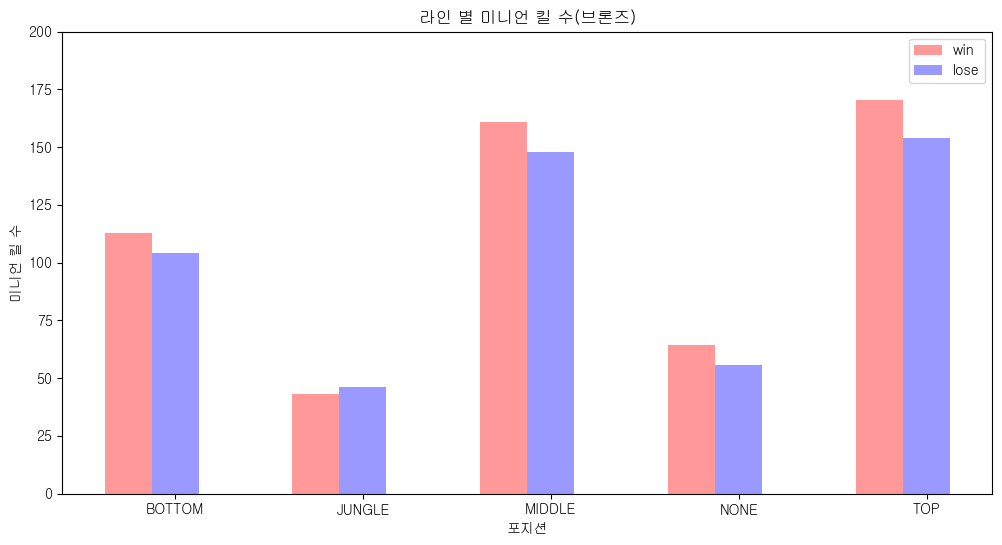

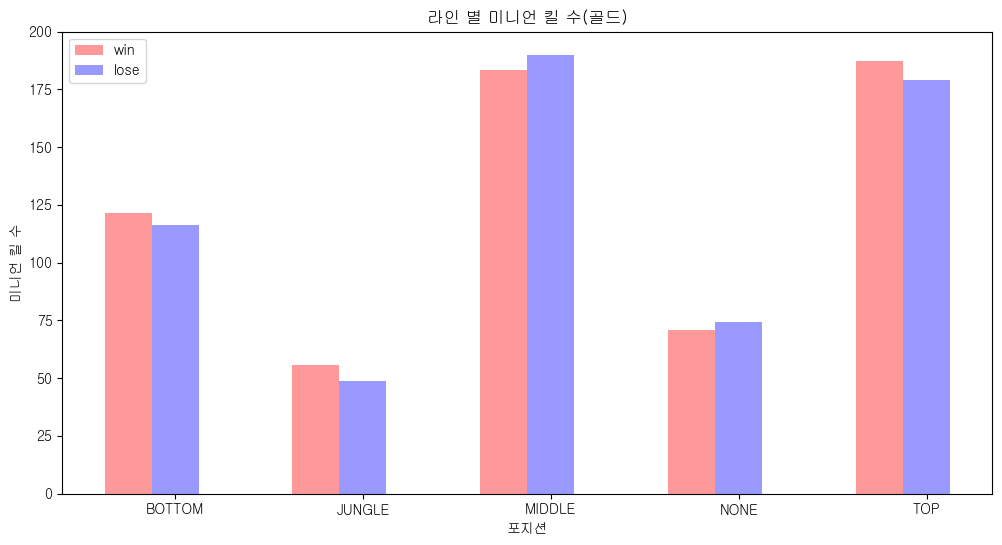

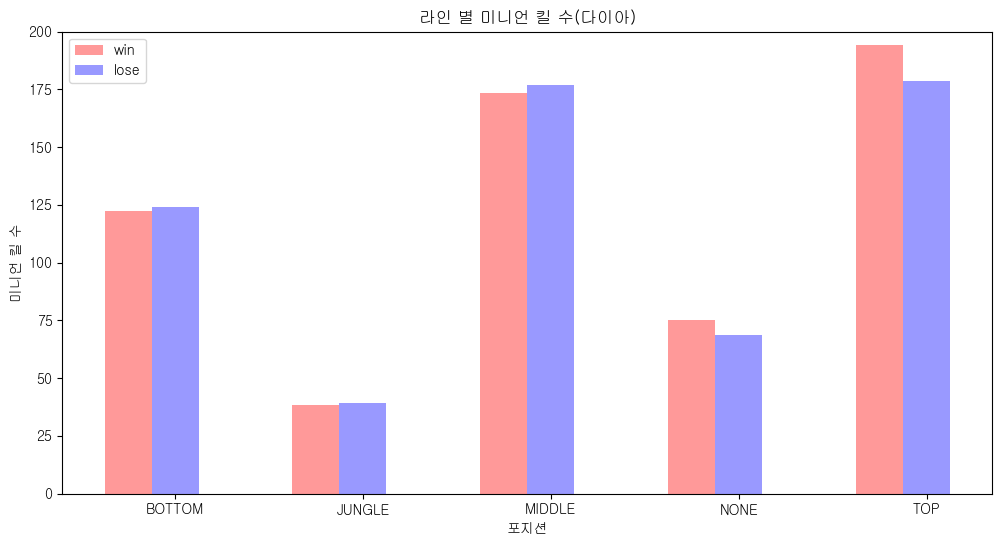

In [112]:
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25
columns = ['BOTTOM', 'JUNGLE', 'MIDDLE', 'NONE', 'TOP']

index = np.arange(5)

# plt.subplot(2, 2, 1)
b1 = plt.bar(index, b_lane_mini['totalMinionsKilled_x'], bar_width, alpha = 0.4, color = 'red', label = 'win')
b2 = plt.bar(index + bar_width, b_lane_mini['totalMinionsKilled_y'], bar_width, alpha = 0.4, color = 'blue', label = 'lose')

plt.xticks(np.arange(bar_width, 5 + bar_width, 1), columns)

plt.title('라인 별 미니언 킬 수(브론즈)')
plt.ylim(0, 200)
plt.xlabel('포지션')
plt.ylabel('미니언 킬 수')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(12,6))
# plt.subplot(2, 2, 2)
b3 = plt.bar(index, g_lane_mini['totalMinionsKilled_x'], bar_width, alpha = 0.4, color = 'red', label = 'win')
b4 = plt.bar(index + bar_width, g_lane_mini['totalMinionsKilled_y'], bar_width, alpha = 0.4, color = 'blue', label = 'lose')

plt.xticks(np.arange(bar_width, 5 + bar_width, 1), columns)

plt.title('라인 별 미니언 킬 수(골드)')
plt.ylim(0, 200)
plt.xlabel('포지션')
plt.ylabel('미니언 킬 수')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(12,6))
# plt.subplot(2, 2, 3)
b5 = plt.bar(index, d_lane_mini['totalMinionsKilled_x'], bar_width, alpha = 0.4, color = 'red', label = 'win')
b6 = plt.bar(index + bar_width, d_lane_mini['totalMinionsKilled_y'], bar_width, alpha = 0.4, color = 'blue', label = 'lose')

plt.xticks(np.arange(bar_width, 5 + bar_width, 1), columns)

plt.title('라인 별 미니언 킬 수(다이아)')
plt.ylim(0, 200)
plt.xlabel('포지션')
plt.ylabel('미니언 킬 수')
plt.legend()
plt.show()

In [113]:
# 와드를 많이 설치하는 곳

In [114]:
def get_ward_position(raw_data) :
    df_creator = []
    print('소환사 스텟 생성 중...')
    for i in range(len(raw_data)) :
        if 'status' in raw_data.iloc[i]['matches'].keys() or 'status' in  raw_data.iloc[i]['timelines'].keys():
            print('status : 426')
        else :
            for j in range(len(raw_data.iloc[i]['timelines']['info']['frames'])) :
                for k in range(len(raw_data.iloc[i]['timelines']['info']['frames'][j]['events'])) :
                    keys = raw_data.iloc[i]['timelines']['info']['frames'][j]['events'][k].keys()
                    if 'wardType' in keys and 'killerId' not in keys:
                        lst_ward = []
                        creatorId = raw_data.iloc[i]['timelines']['info']['frames'][j]['events'][k]['creatorId']

                        if creatorId == 0 :
                            continue
                        else :
                            lst_ward.append(raw_data.iloc[i].matches['info']['gameId'])
                            lst_ward.append(j)
                            lst_ward.append(raw_data.iloc[i].matches['info']['participants'][creatorId-1]['summonerName'])
                            lst_ward.append(raw_data.iloc[i].matches['info']['participants'][creatorId-1]['championName'])
                            lst_ward.append(raw_data.iloc[i].matches['info']['participants'][creatorId-1]['lane'])
                            lst_ward.append(raw_data.iloc[i]['timelines']['info']['frames'][j]['events'][k]['creatorId'])
                            lst_ward.append(raw_data.iloc[i]['timelines']['info']['frames'][j]['events'][k]['timestamp'])
                            lst_ward.append(raw_data.iloc[i]['timelines']['info']['frames'][j]['events'][k]['wardType'])
                            lst_ward.append(raw_data.iloc[i]['timelines']['info']['frames'][j]['participantFrames'][str(creatorId)]['position']['x'])
                            lst_ward.append(raw_data.iloc[i]['timelines']['info']['frames'][j]['participantFrames'][str(creatorId)]['position']['y'])
                            lst_ward.append(raw_data.iloc[i].matches['info']['participants'][creatorId-1]['win'])
                            df_creator.append(lst_ward)
                    else :
                        continue
    ward_df = pd.DataFrame(df_creator, columns = ['gameId', 'time', 'summonerName', 'championName', 'lane', 'creatorId', 'timestamp', 'wardType', 'x', 'y', 'win'])
    return ward_df

In [132]:
bronze_ward_df = get_ward_position(bronze_raw)
bronze_ward_df

소환사 스텟 생성 중...


,gameId,time,summonerName,championName,lane,creatorId,timestamp,wardType,x,y,win
0,6408981794,1,Vo1cano,XinZhao,JUNGLE,2,41219,YELLOW_TRINKET,9917,7793,True
1,6408981794,2,벚꽃이지면나는,Xerath,MIDDLE,8,62514,YELLOW_TRINKET,7727,7515,False
2,6408981794,3,우33좌33,Lux,BOTTOM,10,155944,YELLOW_TRINKET,12115,2157,False
3,6408981794,4,승진이형,Olaf,TOP,6,185820,YELLOW_TRINKET,2739,12614,False
4,6408981794,4,프렌치불독쫀귀탱,Maokai,MIDDLE,5,190082,YELLOW_TRINKET,10892,1010,True
...,...,...,...,...,...,...,...,...,...,...,...
8781,6412255662,17,디기디기딛갱갱갱,Zyra,NONE,5,1015659,SIGHT_WARD,10750,5201,True
8782,6412255662,18,디기디기딛갱갱갱,Zyra,NONE,5,1020405,UNDEFINED,10400,4972,True
8783,6412255662,18,디기디기딛갱갱갱,Zyra,NONE,5,1020607,UNDEFINED,10400,4972,True
8784,6412255662,18,디기디기딛갱갱갱,Zyra,NONE,5,1022905,UNDEFINED,10400,4972,True


In [116]:
bronze_ward_df['wardType'].unique()

array(['YELLOW_TRINKET', 'UNDEFINED', 'CONTROL_WARD', 'SIGHT_WARD',
       'BLUE_TRINKET', 'TEEMO_MUSHROOM'], dtype=object)

In [148]:
b_ward_5_df = bronze_ward_df[bronze_ward_df.time == 5]
b_y_ward_5_df = b_ward_5_df[b_ward_5_df.wardType == 'YELLOW_TRINKET']
b_y_ward_5_df

,gameId,time,summonerName,championName,lane,creatorId,timestamp,wardType,x,y,win
8,6408981794,5,니인생버닝썬,Ezreal,BOTTOM,9,245450,YELLOW_TRINKET,12986,2065,False
9,6408981794,5,벚꽃이지면나는,Xerath,MIDDLE,8,261937,YELLOW_TRINKET,13573,12982,False
10,6408981794,5,야스오만 안함,Darius,TOP,1,264978,YELLOW_TRINKET,882,1840,True
173,6408913113,5,승진이형,Viego,JUNGLE,2,250264,YELLOW_TRINKET,1510,954,True
176,6408913113,5,DMR 담배장전,Illaoi,TOP,6,283470,YELLOW_TRINKET,3066,13266,False
...,...,...,...,...,...,...,...,...,...,...,...
8166,6415347867,5,우엉징우엉징,Talon,TOP,1,241574,YELLOW_TRINKET,3738,13708,True
8167,6415347867,5,볼리베어하는남자,Maokai,BOTTOM,10,247453,YELLOW_TRINKET,11380,3132,False
8170,6415347867,5,설다빈,Cassiopeia,MIDDLE,3,278603,YELLOW_TRINKET,7506,4833,True
8365,6415297956,5,볼리베어하는남자,Volibear,NONE,1,247228,YELLOW_TRINKET,2501,12969,True


In [149]:
b_ward_5_df = bronze_ward_df[bronze_ward_df.time == 5]
b_c_ward_5_df = b_ward_5_df[b_ward_5_df.wardType == 'CONTROL_WARD']
b_c_ward_5_df

,gameId,time,summonerName,championName,lane,creatorId,timestamp,wardType,x,y,win
1192,6411108274,5,속초 수산시장,Blitzcrank,BOTTOM,5,261479,CONTROL_WARD,10640,2960,True
1408,6411028066,5,사노 만지로0,Graves,JUNGLE,7,267235,CONTROL_WARD,14340,14391,True
1695,6409376940,5,NotreDame,Soraka,BOTTOM,5,257320,CONTROL_WARD,12178,2082,False
1941,6399769758,5,여푸푸푸푸,Rumble,MIDDLE,3,287278,CONTROL_WARD,10722,4840,False
2779,6377823524,5,핸드폰바꿨다,Maokai,JUNGLE,7,261772,CONTROL_WARD,9984,8019,False
3100,6402918333,5,성 재 찌 찌,Talon,MIDDLE,3,245595,CONTROL_WARD,6518,6681,False
5278,6413041348,5,윤발임,Lux,BOTTOM,10,299770,CONTROL_WARD,12060,3462,False
6564,6401899704,5,상우라요,Jayce,TOP,6,272415,CONTROL_WARD,2824,12800,False
7518,6304202674,5,니어배를찾아서,Sejuani,JUNGLE,7,268570,CONTROL_WARD,5021,11485,False
8172,6415347867,5,볼리베어하는남자,Maokai,BOTTOM,10,298851,CONTROL_WARD,11380,3132,False


Text(0.5, 1.0, '와드 종류')

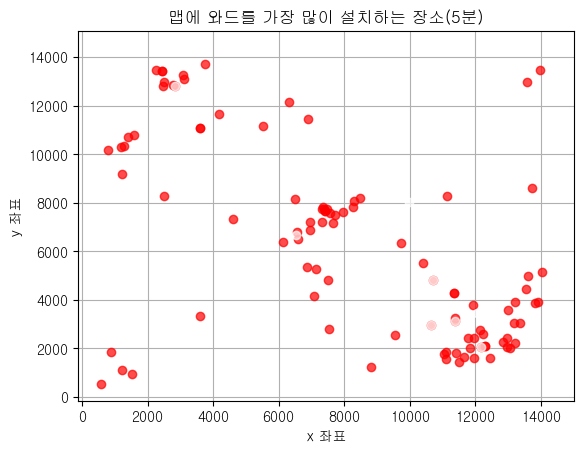

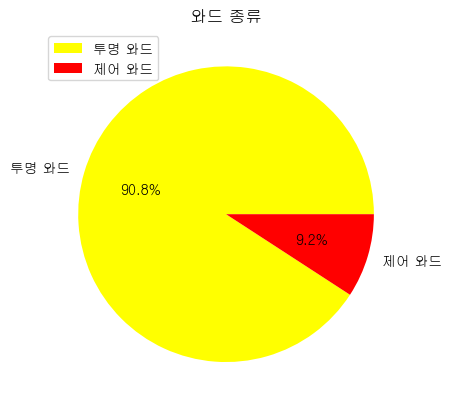

In [164]:
y_x_data = b_y_ward_5_df.x
y_y_data = b_y_ward_5_df.y
c_x_data = b_c_ward_5_df.x
c_y_data = b_c_ward_5_df.y

# 산점도 그래프 그리기
plt.figure()
plt.plot(y_x_data, y_y_data, color = 'r', marker = 'o', linestyle = 'None', alpha=0.7, label = '투명 와드')
plt.plot(c_x_data, c_y_data, color = 'w', marker = 'o', linestyle = 'None', alpha=0.7, label = '제어 와드')
plt.savefig('b_y_ward_5', transparent = True)
plt.xlabel('x 좌표')
plt.ylabel('y 좌표')
plt.title('맵에 와드를 가장 많이 설치하는 장소(5분)')
plt.grid(True)

plt.figure()
plt.pie([b_y_ward_5_df.wardType.count(), b_c_ward_5_df.wardType.count()], labels = ['투명 와드', '제어 와드'], autopct = '%1.1f%%', colors=['yellow', 'red'])
plt.grid(True)
plt.legend(loc = 2)
plt.title('와드 종류')

In [121]:
bronze_ward_df.dtypes

gameId           int64
time             int64
summonerName    object
championName    object
lane            object
creatorId        int64
timestamp        int64
wardType        object
x                int64
y                int64
win               bool
dtype: object

In [156]:
b_y_ward_5_df.wardType.count()

99

In [165]:
b_ward_15_df = bronze_ward_df[bronze_ward_df.time == 15]
b_c_ward_15_df = b_ward_15_df[b_ward_15_df.wardType == 'CONTROL_WARD']
b_c_ward_15_df

,gameId,time,summonerName,championName,lane,creatorId,timestamp,wardType,x,y,win
982,6391889080,15,이수발람들아,Sylas,NONE,8,853131,CONTROL_WARD,9390,1406,True
983,6391889080,15,코카콜라한방울,MissFortune,NONE,4,856436,CONTROL_WARD,1656,1189,False
1737,6409376940,15,토레스 진리,LeeSin,JUNGLE,7,846401,CONTROL_WARD,9310,9604,True
2000,6399769758,15,여푸푸푸푸,Rumble,MIDDLE,3,858745,CONTROL_WARD,460,483,False
2648,6399662684,15,qwerty is me,Leona,BOTTOM,10,865363,CONTROL_WARD,6760,9149,False
2984,6403023609,15,어디서좀놀았니,Annie,BOTTOM,5,865486,CONTROL_WARD,3546,11619,True
3789,6398171262,15,spz Rayga,Caitlyn,BOTTOM,4,884056,CONTROL_WARD,2572,12970,True
6002,6412916877,15,장발 윤,Illaoi,TOP,6,899053,CONTROL_WARD,867,7979,True
6167,6414962510,15,엔돌핀박,Nidalee,JUNGLE,7,867598,CONTROL_WARD,12254,6670,True
6169,6414962510,15,우에하라 박현욱,Gangplank,TOP,1,898484,CONTROL_WARD,3358,11543,False


In [167]:
b_ward_15_df = bronze_ward_df[bronze_ward_df.time == 15]
b_y_ward_15_df = b_ward_15_df[b_ward_15_df.wardType == 'YELLOW_TRINKET']
b_y_ward_15_df

,gameId,time,summonerName,championName,lane,creatorId,timestamp,wardType,x,y,win
364,6408913113,15,Min Park,Jinx,BOTTOM,4,858930,YELLOW_TRINKET,12280,2087,True
366,6408913113,15,Min Park,Jinx,BOTTOM,4,871922,YELLOW_TRINKET,12280,2087,True
369,6408913113,15,무궁뎅이,Malzahar,MIDDLE,3,886157,YELLOW_TRINKET,8570,5573,True
370,6408913113,15,겨도랑이,Twitch,BOTTOM,9,893355,YELLOW_TRINKET,12473,2369,False
984,6391889080,15,가하고나하고다다,Twitch,NONE,9,856735,YELLOW_TRINKET,7718,7996,True
...,...,...,...,...,...,...,...,...,...,...,...
8217,6415347867,15,딸기맛된장국,Jhin,BOTTOM,9,852516,YELLOW_TRINKET,7786,8445,False
8499,6415297956,15,희수어딨게,Sylas,NONE,2,849467,YELLOW_TRINKET,11755,1707,True
8510,6415297956,15,생활바나나,Tristana,NONE,9,894124,YELLOW_TRINKET,11657,3882,False
8748,6412255662,15,1QSHAN,Yasuo,NONE,8,843882,YELLOW_TRINKET,6865,6499,False


Text(0.5, 1.0, '와드 종류')

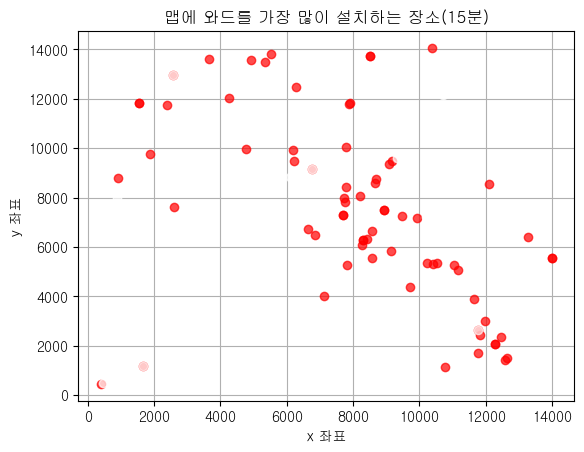

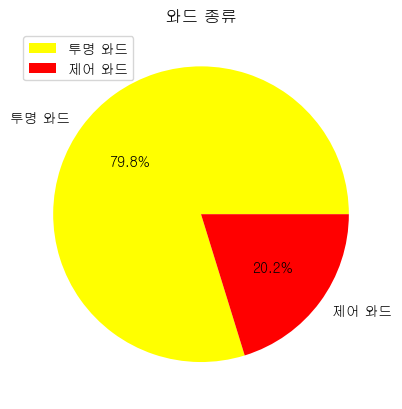

In [169]:
y_x_data = b_y_ward_15_df.x
y_y_data = b_y_ward_15_df.y
c_x_data = b_c_ward_15_df.x
c_y_data = b_c_ward_15_df.y

# 산점도 그래프 그리기
plt.figure()
plt.plot(y_x_data, y_y_data, color = 'r', marker = 'o', linestyle = 'None', alpha=0.7, label = '투명 와드')
plt.plot(c_x_data, c_y_data, color = 'w', marker = 'o', linestyle = 'None', alpha=0.7, label = '제어 와드')
plt.savefig('b_y_ward_15', transparent = True)
plt.xlabel('x 좌표')
plt.ylabel('y 좌표')
plt.title('맵에 와드를 가장 많이 설치하는 장소(15분)')
plt.grid(True)

plt.figure()
plt.pie([b_y_ward_15_df.wardType.count(), b_c_ward_15_df.wardType.count()], labels = ['투명 와드', '제어 와드'], autopct = '%1.1f%%', colors=['yellow', 'red'])
plt.grid(True)
plt.legend(loc = 2)
plt.title('와드 종류')

In [170]:
b_ward_25_df = bronze_ward_df[bronze_ward_df.time == 25]
b_c_ward_25_df = b_ward_15_df[b_ward_15_df.wardType == 'CONTROL_WARD']
b_y_ward_25_df = b_ward_15_df[b_ward_15_df.wardType == 'YELLOW_TRINKET']

In [171]:
b_c_ward_25_df

,gameId,time,summonerName,championName,lane,creatorId,timestamp,wardType,x,y,win
982,6391889080,15,이수발람들아,Sylas,NONE,8,853131,CONTROL_WARD,9390,1406,True
983,6391889080,15,코카콜라한방울,MissFortune,NONE,4,856436,CONTROL_WARD,1656,1189,False
1737,6409376940,15,토레스 진리,LeeSin,JUNGLE,7,846401,CONTROL_WARD,9310,9604,True
2000,6399769758,15,여푸푸푸푸,Rumble,MIDDLE,3,858745,CONTROL_WARD,460,483,False
2648,6399662684,15,qwerty is me,Leona,BOTTOM,10,865363,CONTROL_WARD,6760,9149,False
2984,6403023609,15,어디서좀놀았니,Annie,BOTTOM,5,865486,CONTROL_WARD,3546,11619,True
3789,6398171262,15,spz Rayga,Caitlyn,BOTTOM,4,884056,CONTROL_WARD,2572,12970,True
6002,6412916877,15,장발 윤,Illaoi,TOP,6,899053,CONTROL_WARD,867,7979,True
6167,6414962510,15,엔돌핀박,Nidalee,JUNGLE,7,867598,CONTROL_WARD,12254,6670,True
6169,6414962510,15,우에하라 박현욱,Gangplank,TOP,1,898484,CONTROL_WARD,3358,11543,False


In [172]:
b_y_ward_25_df

,gameId,time,summonerName,championName,lane,creatorId,timestamp,wardType,x,y,win
364,6408913113,15,Min Park,Jinx,BOTTOM,4,858930,YELLOW_TRINKET,12280,2087,True
366,6408913113,15,Min Park,Jinx,BOTTOM,4,871922,YELLOW_TRINKET,12280,2087,True
369,6408913113,15,무궁뎅이,Malzahar,MIDDLE,3,886157,YELLOW_TRINKET,8570,5573,True
370,6408913113,15,겨도랑이,Twitch,BOTTOM,9,893355,YELLOW_TRINKET,12473,2369,False
984,6391889080,15,가하고나하고다다,Twitch,NONE,9,856735,YELLOW_TRINKET,7718,7996,True
...,...,...,...,...,...,...,...,...,...,...,...
8217,6415347867,15,딸기맛된장국,Jhin,BOTTOM,9,852516,YELLOW_TRINKET,7786,8445,False
8499,6415297956,15,희수어딨게,Sylas,NONE,2,849467,YELLOW_TRINKET,11755,1707,True
8510,6415297956,15,생활바나나,Tristana,NONE,9,894124,YELLOW_TRINKET,11657,3882,False
8748,6412255662,15,1QSHAN,Yasuo,NONE,8,843882,YELLOW_TRINKET,6865,6499,False


Text(0.5, 1.0, '와드 종류')

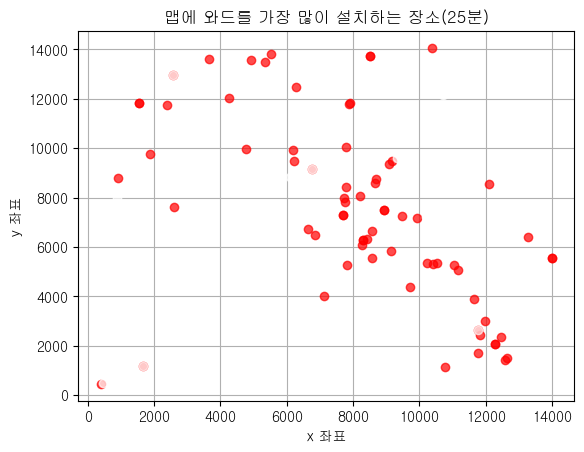

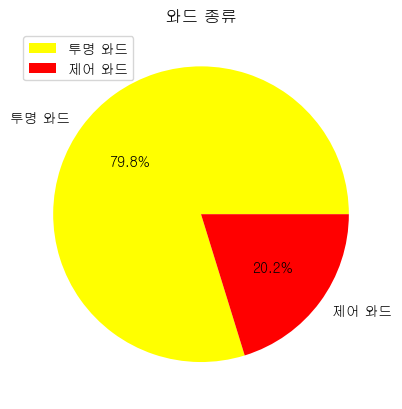

In [173]:
y_x_data = b_y_ward_25_df.x
y_y_data = b_y_ward_25_df.y
c_x_data = b_c_ward_25_df.x
c_y_data = b_c_ward_25_df.y

# 산점도 그래프 그리기
plt.figure()
plt.plot(y_x_data, y_y_data, color = 'r', marker = 'o', linestyle = 'None', alpha=0.7, label = '투명 와드')
plt.plot(c_x_data, c_y_data, color = 'w', marker = 'o', linestyle = 'None', alpha=0.7, label = '제어 와드')
plt.savefig('b_y_ward_25', transparent = True)
plt.xlabel('x 좌표')
plt.ylabel('y 좌표')
plt.title('맵에 와드를 가장 많이 설치하는 장소(25분)')
plt.grid(True)

plt.figure()
plt.pie([b_y_ward_25_df.wardType.count(), b_c_ward_25_df.wardType.count()], labels = ['투명 와드', '제어 와드'], autopct = '%1.1f%%', colors=['yellow', 'red'])
plt.grid(True)
plt.legend(loc = 2)
plt.title('와드 종류')

In [174]:
raw = pd.concat([dia_raw, gold_raw, bronze_raw], ignore_index=True)
raw

,match_id,matches,timelines
0,KR_6415368525,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
1,KR_6415317488,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
2,KR_6414277632,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
3,KR_6403760533,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
4,KR_6403735000,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
...,...,...,...
93,KR_6366466537,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
94,KR_6366392508,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
95,KR_6415347867,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
96,KR_6415297956,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."


In [175]:
ward_df = get_ward_position(raw)

소환사 스텟 생성 중...
status : 426
status : 426
status : 426
status : 426
status : 426
status : 426
status : 426
status : 426
status : 426
status : 426
status : 426


In [176]:
ward_df

,gameId,time,summonerName,championName,lane,creatorId,timestamp,wardType,x,y,win
0,6415368525,2,ArinArin,Galio,NONE,10,66808,YELLOW_TRINKET,13430,3465,False
1,6415368525,2,케리아만나러챌감,Maokai,NONE,5,93766,YELLOW_TRINKET,13323,2307,True
2,6415368525,3,K 잼,Akshan,NONE,3,143545,YELLOW_TRINKET,7611,7531,True
3,6415368525,3,트롤칸신,Trundle,NONE,6,155305,YELLOW_TRINKET,2365,11825,False
4,6415368525,4,나는나쁜놈이야,Fiora,NONE,1,193581,YELLOW_TRINKET,1856,13065,True
...,...,...,...,...,...,...,...,...,...,...,...
19082,6412255662,17,디기디기딛갱갱갱,Zyra,NONE,5,1015659,SIGHT_WARD,10750,5201,True
19083,6412255662,18,디기디기딛갱갱갱,Zyra,NONE,5,1020405,UNDEFINED,10400,4972,True
19084,6412255662,18,디기디기딛갱갱갱,Zyra,NONE,5,1020607,UNDEFINED,10400,4972,True
19085,6412255662,18,디기디기딛갱갱갱,Zyra,NONE,5,1022905,UNDEFINED,10400,4972,True


In [177]:
ward_5_df = ward_df[ward_df.time == 5]
c_ward_5_df = ward_5_df[ward_5_df.wardType == 'CONTROL_WARD']
y_ward_5_df = ward_5_df[ward_5_df.wardType == 'YELLOW_TRINKET']

In [178]:
c_ward_5_df

,gameId,time,summonerName,championName,lane,creatorId,timestamp,wardType,x,y,win
10,6415368525,5,케리아만나러챌감,Maokai,NONE,5,295748,CONTROL_WARD,11244,6031,True
87,6415317488,5,한울ul,Rell,BOTTOM,10,278592,CONTROL_WARD,11127,5616,False
277,6414277632,5,키야 나 잘하네,Rumble,TOP,10,292877,CONTROL_WARD,8906,6425,False
676,6403760533,5,왜너같은애들은맨날우리팀이야,Zed,NONE,3,268802,CONTROL_WARD,4131,10324,False
745,6403735000,5,지치지않아,MonkeyKing,JUNGLE,2,253555,CONTROL_WARD,1690,10410,True
749,6403735000,5,UnbeloveD Longer,Viego,JUNGLE,7,295708,CONTROL_WARD,1956,12652,False
1271,6392161815,5,보그다노프,Vex,MIDDLE,3,266218,CONTROL_WARD,7214,6230,True
1459,6406578076,5,민쥬공화국,Blitzcrank,BOTTOM,5,275686,CONTROL_WARD,12311,3042,False
2719,6413260030,5,HAPPY GAME XD GG,Lux,NONE,5,248200,CONTROL_WARD,11755,2130,False
2780,6413236289,5,Rebirth Cookie,Kindred,NONE,7,267893,CONTROL_WARD,8628,2580,True


In [179]:
y_ward_5_df

,gameId,time,summonerName,championName,lane,creatorId,timestamp,wardType,x,y,win
8,6415368525,5,보미여름이가을이,LeeSin,NONE,7,259672,YELLOW_TRINKET,6234,12297,False
9,6415368525,5,혁둥잉,Aphelios,NONE,9,271172,YELLOW_TRINKET,13799,8188,False
84,6415317488,5,kkgg,Riven,TOP,1,245914,YELLOW_TRINKET,3120,13050,True
85,6415317488,5,kkgg,Riven,TOP,1,273869,YELLOW_TRINKET,3120,13050,True
86,6415317488,5,자객 발톱,Fiora,TOP,6,276776,YELLOW_TRINKET,3028,13205,False
...,...,...,...,...,...,...,...,...,...,...,...
18467,6415347867,5,우엉징우엉징,Talon,TOP,1,241574,YELLOW_TRINKET,3738,13708,True
18468,6415347867,5,볼리베어하는남자,Maokai,BOTTOM,10,247453,YELLOW_TRINKET,11380,3132,False
18471,6415347867,5,설다빈,Cassiopeia,MIDDLE,3,278603,YELLOW_TRINKET,7506,4833,True
18666,6415297956,5,볼리베어하는남자,Volibear,NONE,1,247228,YELLOW_TRINKET,2501,12969,True


Text(0.5, 1.0, '와드 종류')

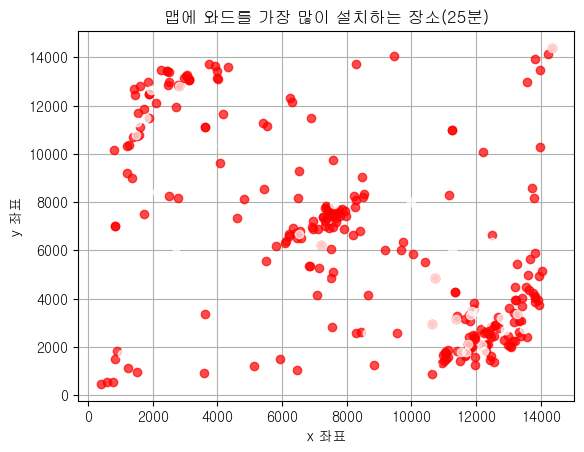

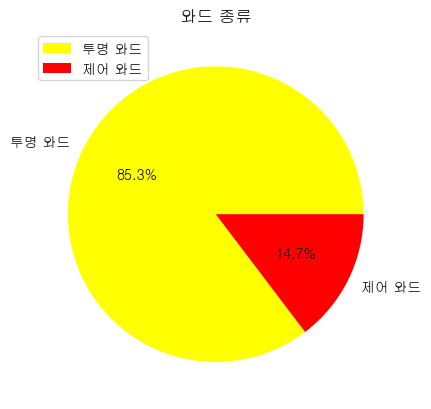

In [181]:
y_x_data = y_ward_5_df.x
y_y_data = y_ward_5_df.y
c_x_data = c_ward_5_df.x
c_y_data = c_ward_5_df.y

# 산점도 그래프 그리기
plt.figure()
plt.plot(y_x_data, y_y_data, color = 'r', marker = 'o', linestyle = 'None', alpha=0.7, label = '투명 와드')
plt.plot(c_x_data, c_y_data, color = 'w', marker = 'o', linestyle = 'None', alpha=0.7, label = '제어 와드')
plt.savefig('ward_5', transparent = True)
plt.xlabel('x 좌표')
plt.ylabel('y 좌표')
plt.title('맵에 와드를 가장 많이 설치하는 장소(25분)')
plt.grid(True)

plt.figure()
plt.pie([y_ward_5_df.wardType.count(), c_ward_5_df.wardType.count()], labels = ['투명 와드', '제어 와드'], autopct = '%1.1f%%', colors=['yellow', 'red'])
plt.grid(True)
plt.legend(loc = 2)
plt.title('와드 종류')

In [182]:
ward_15_df = ward_df[ward_df.time == 15]
c_ward_15_df = ward_15_df[ward_15_df.wardType == 'CONTROL_WARD']
y_ward_15_df = ward_15_df[ward_15_df.wardType == 'YELLOW_TRINKET']

Text(0.5, 1.0, '와드 종류')

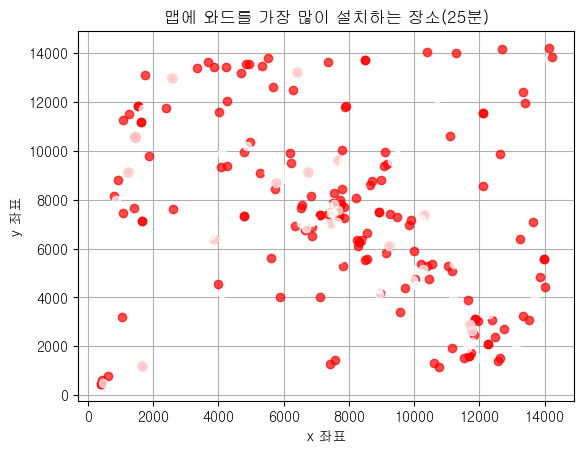

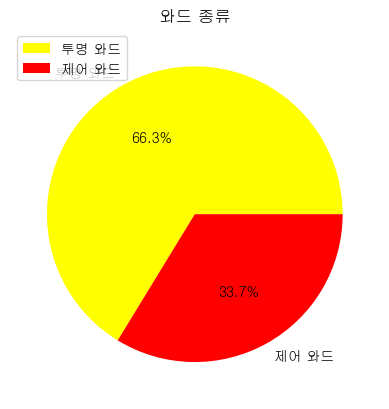

In [188]:
y_x_data = y_ward_15_df.x
y_y_data = y_ward_15_df.y
c_x_data = c_ward_15_df.x
c_y_data = c_ward_15_df.y

# 산점도 그래프 그리기
plt.figure()
plt.plot(y_x_data, y_y_data, color = 'r', marker = 'o', linestyle = 'None', alpha=0.7, label = '투명 와드')
plt.plot(c_x_data, c_y_data, color = 'w', marker = 'o', linestyle = 'None', alpha=0.7, label = '제어 와드')
plt.savefig('ward_15', transparent = True)
plt.xlabel('x 좌표')
plt.ylabel('y 좌표')
plt.title('맵에 와드를 가장 많이 설치하는 장소(25분)')
plt.grid(True)

plt.figure()
plt.pie([y_ward_15_df.wardType.count(), c_ward_15_df.wardType.count()], labels = ['투명 와드', '제어 와드'], autopct = '%1.1f%%', colors=['yellow', 'red'])
plt.grid(True)
plt.legend(loc = 2)
plt.title('와드 종류')

In [196]:
ward_20_df = ward_df[ward_df.time == 20]
c_ward_20_df = ward_20_df[ward_20_df.wardType == 'CONTROL_WARD']
y_ward_20_df = ward_20_df[ward_20_df.wardType == 'YELLOW_TRINKET']

In [197]:
c_ward_20_df

,gameId,time,summonerName,championName,lane,creatorId,timestamp,wardType,x,y,win
163,6415317488,20,스쳐간병준의살기,Belveth,BOTTOM,5,1153449,CONTROL_WARD,7236,3320,True
166,6415317488,20,연구원 좁쌀,Graves,JUNGLE,2,1185958,CONTROL_WARD,9109,2429,True
574,6414277632,20,상승하는기세,Pyke,BOTTOM,5,1165537,CONTROL_WARD,10077,7612,True
575,6414277632,20,쭈꾸미를잊지말것,Kaisa,BOTTOM,9,1174561,CONTROL_WARD,12072,6970,False
806,6403735000,20,UnbeloveD Longer,Viego,JUNGLE,7,1179138,CONTROL_WARD,11669,12139,False
...,...,...,...,...,...,...,...,...,...,...,...
17447,6304274997,20,굴옴희,Seraphine,BOTTOM,10,1154242,CONTROL_WARD,2087,8399,True
17887,6304202674,20,쫀쫀케이,MissFortune,BOTTOM,9,1147601,CONTROL_WARD,10102,5219,False
18186,6315733062,20,mute alIllIlllll,Shaco,BOTTOM,5,1151721,CONTROL_WARD,11933,6854,False
18441,6402603522,20,별이 빛나는,Jinx,BOTTOM,9,1155450,CONTROL_WARD,9216,8877,False


In [198]:
y_ward_20_df

,gameId,time,summonerName,championName,lane,creatorId,timestamp,wardType,x,y,win
165,6415317488,20,Jchun,LeeSin,JUNGLE,7,1171157,YELLOW_TRINKET,11197,8292,False
167,6415317488,20,kkgg,Riven,TOP,1,1192499,YELLOW_TRINKET,7802,5929,True
801,6403735000,20,할머니의피지컬,Zeri,BOTTOM,9,1145497,YELLOW_TRINKET,12077,11477,False
807,6403735000,20,잔나 S2,Rengar,TOP,1,1181155,YELLOW_TRINKET,10632,10948,True
976,6392182519,20,채팅차단했음1,Annie,BOTTOM,5,1141071,YELLOW_TRINKET,932,9304,False
...,...,...,...,...,...,...,...,...,...,...,...
18196,6315733062,20,리컨민,Shyvana,JUNGLE,2,1195872,YELLOW_TRINKET,5085,9117,False
18440,6402603522,20,디에스제이에이,Darius,TOP,6,1153732,YELLOW_TRINKET,8797,9090,False
18444,6402603522,20,토마토쥬스 냠냠,Syndra,MIDDLE,8,1174079,YELLOW_TRINKET,5011,13661,False
18538,6415347867,20,겜은빡세게,Nunu,JUNGLE,2,1184881,YELLOW_TRINKET,7106,4045,True


Text(0.5, 1.0, '와드 종류')

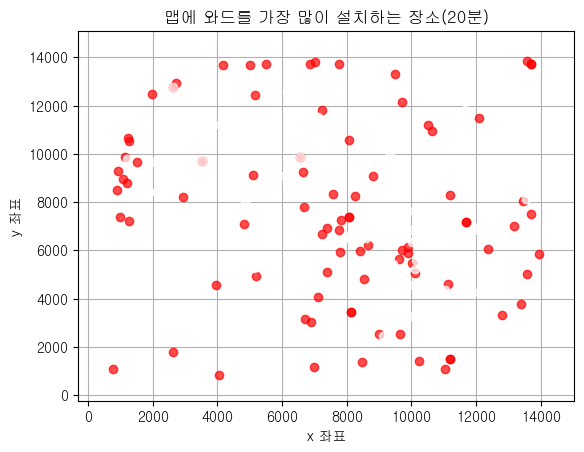

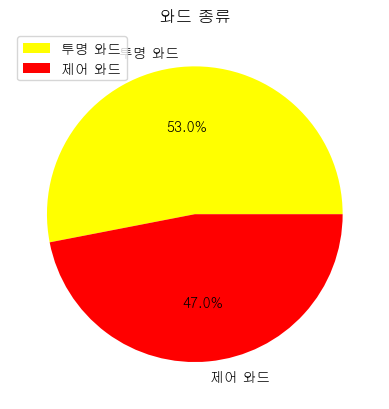

In [199]:
y_x_data = y_ward_20_df.x
y_y_data = y_ward_20_df.y
c_x_data = c_ward_20_df.x
c_y_data = c_ward_20_df.y

# 산점도 그래프 그리기
plt.figure()
plt.plot(y_x_data, y_y_data, color = 'r', marker = 'o', linestyle = 'None', alpha=0.7, label = '투명 와드')
plt.plot(c_x_data, c_y_data, color = 'w', marker = 'o', linestyle = 'None', alpha=0.7, label = '제어 와드')
plt.savefig('ward_20', transparent = True)
plt.xlabel('x 좌표')
plt.ylabel('y 좌표')
plt.title('맵에 와드를 가장 많이 설치하는 장소(20분)')
plt.grid(True)

plt.figure()
plt.pie([y_ward_20_df.wardType.count(), c_ward_20_df.wardType.count()], labels = ['투명 와드', '제어 와드'], autopct = '%1.1f%%', colors=['yellow', 'red'])
plt.grid(True)
plt.legend(loc = 2)
plt.title('와드 종류')